# Data Wrangling

## Gather

In [1]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
tka_train = pd.read_excel(r'C:\Users\HP\Desktop\Predicting-Component-Sizing-in-Primary-Total-Knee-Arthroplasty-using-Demographic-Variables\Data\Raw\Training Data Set- Clean.xlsx')
tka_test = pd.read_excel(r'C:\Users\HP\Desktop\Predicting-Component-Sizing-in-Primary-Total-Knee-Arthroplasty-using-Demographic-Variables\Data\Raw\Testing Data Set- Clean.xlsx')

## Assess

In [3]:
tka_train.describe()

,Femur AP Dimension (mm),Tibia ML Dimension (mm),"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.Height_cm,Procedure_TKR.Weight_kg,Procedure_TKR.BMI
count,3389.000000,3384.000000,3400.000000,3393.000000,3399.000000,3385.000000
mean,64.445117,72.255496,0.372647,168.853248,96.577129,35.346689
std,56.865458,57.014339,0.483580,56.762893,61.697155,29.581954
min,52.300000,43.000000,0.000000,0.000000,0.000000,12.771436
25%,59.600000,66.000000,0.000000,160.020000,78.000000,27.896468
50%,63.500000,71.000000,0.000000,167.640000,92.300000,32.227499
75%,66.200000,75.100000,1.000000,175.260000,109.090000,37.966465
max,3363.000000,3371.000000,1.000000,3377.000000,3377.000000,622.558594


In [4]:
tka_test.describe()

,age,"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.BMI,Procedure_TKR.Weight_kg,Procedure_TKR.Height_cm,Femur implanted,Tibia Implanted
count,495.000000,496.000000,490.000000,491.000000,491.000000,491.000000,488.000000
mean,65.060606,0.389113,33.332373,95.979063,169.359898,64.157434,71.393033
std,9.329786,0.488041,6.857739,23.122266,11.086556,5.047097,5.876109
min,30.000000,0.000000,18.959000,44.900000,139.700000,51.900000,58.000000
25%,59.000000,0.000000,28.638000,80.300000,160.000000,59.600000,66.000000
50%,66.000000,0.000000,32.289500,93.400000,167.710000,63.000000,71.000000
75%,71.500000,1.000000,37.459250,108.700000,177.800000,67.350000,75.000000
max,87.000000,1.000000,62.980000,195.000000,195.600000,77.500000,87.000000


In [5]:
# Display the first 5 rows of the training data
tka_train.head()

,Procedure_TKR2.F_Company,Procedure_TKR2.F_Model,Procedure_TKR2.F_Details,Femur AP Dimension (mm),Procedure_TKR2.T_Model,Procedure_TKR2.T_Details,Tibia ML Dimension (mm),Procedure_TKR2.Pat_Model,Procedure_TKR2.Pat_Details,Procedure_TKR2.Poly_Model,...,"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.Height_cm,Procedure_TKR.Weight_kg,Procedure_TKR.BMI,Surgery_Main.Side,Surgery_Main.Procedure,Procedure_TKR.Primary_Diagnosis,Procedure_TKR.ASARisk,Procedure_TKR.Approach,Unnamed: 22
0,Zimmer,Persona,"Size 6, Left, Cemented, PS, Standard",60.4,Persona,"Size C, Left, 5 Degree, STM",63.8,Persona,"All poly, 35mm",Persona,...,0.0,60.00,58.64,162.888889,Left,Primary TKR,Degenerative Arthritis,II,Medial Parapatellar,NaN
1,Zimmer,NexGen LPS Option,"Left, Size C",53.5,NexGen,"Micro/1, 40mm A/P, 58mm M/L, Precoat Stemmed",58.0,NaN,NaN,NaN,...,0.0,116.84,62.20,45.562473,Left,Primary TKR,NaN,III,Medial Parapatellar,NaN
2,Zimmer,NexGen GS LPS - Flex,"Left, Size D",57.5,NexGen,"Size 3, PreCoat Stemmed",66.0,NexGen All-Poly Patella,"32mm, 8.5mm Thickness",NexGen LPS-Flex Fixed Molded Articular Surface,...,0.0,127.00,52.00,32.240064,Left,Primary TKR,Degenerative Arthritis,III,MIS-Midvastus,NaN
3,Zimmer,NexGen GS LPS - Flex,"Right, Size F",65.3,NexGen,"Size 3, PreCoat Stemmed",66.0,NexGen All-Poly Patella,"32mm, 8.5mm Thickness",NexGen LPS-Flex Fixed Molded Articular Surface,...,0.0,124.46,68.64,44.311625,Right,Primary TKR,Degenerative Arthritis,II,Medial Parapatellar,NaN
4,Zimmer,Persona CR,"CR, Narrow, Size 7, Left",60.8,Persona,"Size D, Left, 5 Degree, NP STM",67.0,Persona,"All poly, 32mm",Persona CR,...,0.0,121.92,75.00,50.455830,Left,Primary TKR,Degenerative Arthritis,III,MIS-Midvastus,NaN


In [6]:
# Display the first 5 rows of the testing data
tka_test.head()

,age,right,"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.BMI,Procedure_TKR.Weight_kg,Procedure_TKR.Height_cm,Femoral Model,Femur implanted,Tibial Model,Tibia Implanted
0,59.0,1,0.0,30.13,95.3,177.8,SN Legion Size 6,66.0,Genesis II size 5,74.0
1,42.0,0,1.0,32.49,100.2,173.2,SN Legion Size 7,70.0,Genesis II size 6,77.0
2,71.0,0,0.0,34.00,98.4,170.2,Stryker Triathlon Femoral 5,65.0,Stryker Triathlon Tibial 5,74.0
3,83.0,0,0.0,24.27,62.1,160.0,SN Legion Size 4,59.0,Genesis II size 2,64.0
4,56.0,1,1.0,49.51,161.0,180.3,Stryker Triathlon Femoral 8,75.0,Stryker Triathlon Tibial 7,80.0


In [7]:
# Display the shape of the training data
tka_train.shape

(3407, 23)

In [8]:
# Display the shape of the testing data
tka_test.shape

(513, 10)

### Column names

In [9]:
# Print the columns of the training data
tka_train.columns

Index(['Procedure_TKR2.F_Company', 'Procedure_TKR2.F_Model',
       'Procedure_TKR2.F_Details', 'Femur AP Dimension (mm)',
       'Procedure_TKR2.T_Model', 'Procedure_TKR2.T_Details',
       'Tibia ML Dimension (mm)', 'Procedure_TKR2.Pat_Model',
       'Procedure_TKR2.Pat_Details', 'Procedure_TKR2.Poly_Model',
       'Procedure_TKR2.Poly_Details', 'Procedure_TKR2.O1_Model',
       'Procedure_TKR2.O1_Details', 'Demographics.Gender (0=Female, 1=Male)',
       'Procedure_TKR.Height_cm', 'Procedure_TKR.Weight_kg',
       'Procedure_TKR.BMI', 'Surgery_Main.Side', 'Surgery_Main.Procedure',
       'Procedure_TKR.Primary_Diagnosis', 'Procedure_TKR.ASARisk',
       'Procedure_TKR.Approach', 'Unnamed: 22'],
      dtype='object')

In [10]:
# Print the columns of the testing data
tka_test.columns

Index(['age', 'right', 'Demographics.Gender (0=Female, 1=Male)',
       'Procedure_TKR.BMI', 'Procedure_TKR.Weight_kg',
       'Procedure_TKR.Height_cm', 'Femoral Model', 'Femur implanted',
       'Tibial Model', 'Tibia Implanted'],
      dtype='object')

### Data types

In [11]:
# Display the data types of the training data
tka_train.dtypes

Procedure_TKR2.F_Company                   object
Procedure_TKR2.F_Model                     object
Procedure_TKR2.F_Details                   object
Femur AP Dimension (mm)                   float64
Procedure_TKR2.T_Model                     object
Procedure_TKR2.T_Details                   object
Tibia ML Dimension (mm)                   float64
Procedure_TKR2.Pat_Model                   object
Procedure_TKR2.Pat_Details                 object
Procedure_TKR2.Poly_Model                  object
Procedure_TKR2.Poly_Details                object
Procedure_TKR2.O1_Model                    object
Procedure_TKR2.O1_Details                  object
Demographics.Gender (0=Female, 1=Male)    float64
Procedure_TKR.Height_cm                   float64
Procedure_TKR.Weight_kg                   float64
Procedure_TKR.BMI                         float64
Surgery_Main.Side                          object
Surgery_Main.Procedure                     object
Procedure_TKR.Primary_Diagnosis            object


In [12]:
# Display the data types of the testing data
tka_test.dtypes

age                                       float64
right                                      object
Demographics.Gender (0=Female, 1=Male)    float64
Procedure_TKR.BMI                         float64
Procedure_TKR.Weight_kg                   float64
Procedure_TKR.Height_cm                   float64
Femoral Model                              object
Femur implanted                           float64
Tibial Model                               object
Tibia Implanted                           float64
dtype: object

### Duplicates

In [13]:
# Check for duplicates in the training data
tka_train.duplicated().sum()

10

In [14]:
# Check for duplicates in the testing data
tka_test.duplicated().sum()

17

### Missing values

In [15]:
# Check for missing values in the training data
tka_train.isnull().sum()

Procedure_TKR2.F_Company                     5
Procedure_TKR2.F_Model                       9
Procedure_TKR2.F_Details                    11
Femur AP Dimension (mm)                     18
Procedure_TKR2.T_Model                      11
Procedure_TKR2.T_Details                    15
Tibia ML Dimension (mm)                     23
Procedure_TKR2.Pat_Model                    26
Procedure_TKR2.Pat_Details                  26
Procedure_TKR2.Poly_Model                   12
Procedure_TKR2.Poly_Details                 11
Procedure_TKR2.O1_Model                   2898
Procedure_TKR2.O1_Details                 2898
Demographics.Gender (0=Female, 1=Male)       7
Procedure_TKR.Height_cm                     14
Procedure_TKR.Weight_kg                      8
Procedure_TKR.BMI                           22
Surgery_Main.Side                            5
Surgery_Main.Procedure                       5
Procedure_TKR.Primary_Diagnosis             22
Procedure_TKR.ASARisk                       13
Procedure_TKR

In [16]:
# Check for missing values in the testing data
tka_test.isnull().sum()

age                                       18
right                                     17
Demographics.Gender (0=Female, 1=Male)    17
Procedure_TKR.BMI                         23
Procedure_TKR.Weight_kg                   22
Procedure_TKR.Height_cm                   22
Femoral Model                             22
Femur implanted                           22
Tibial Model                              22
Tibia Implanted                           25
dtype: int64

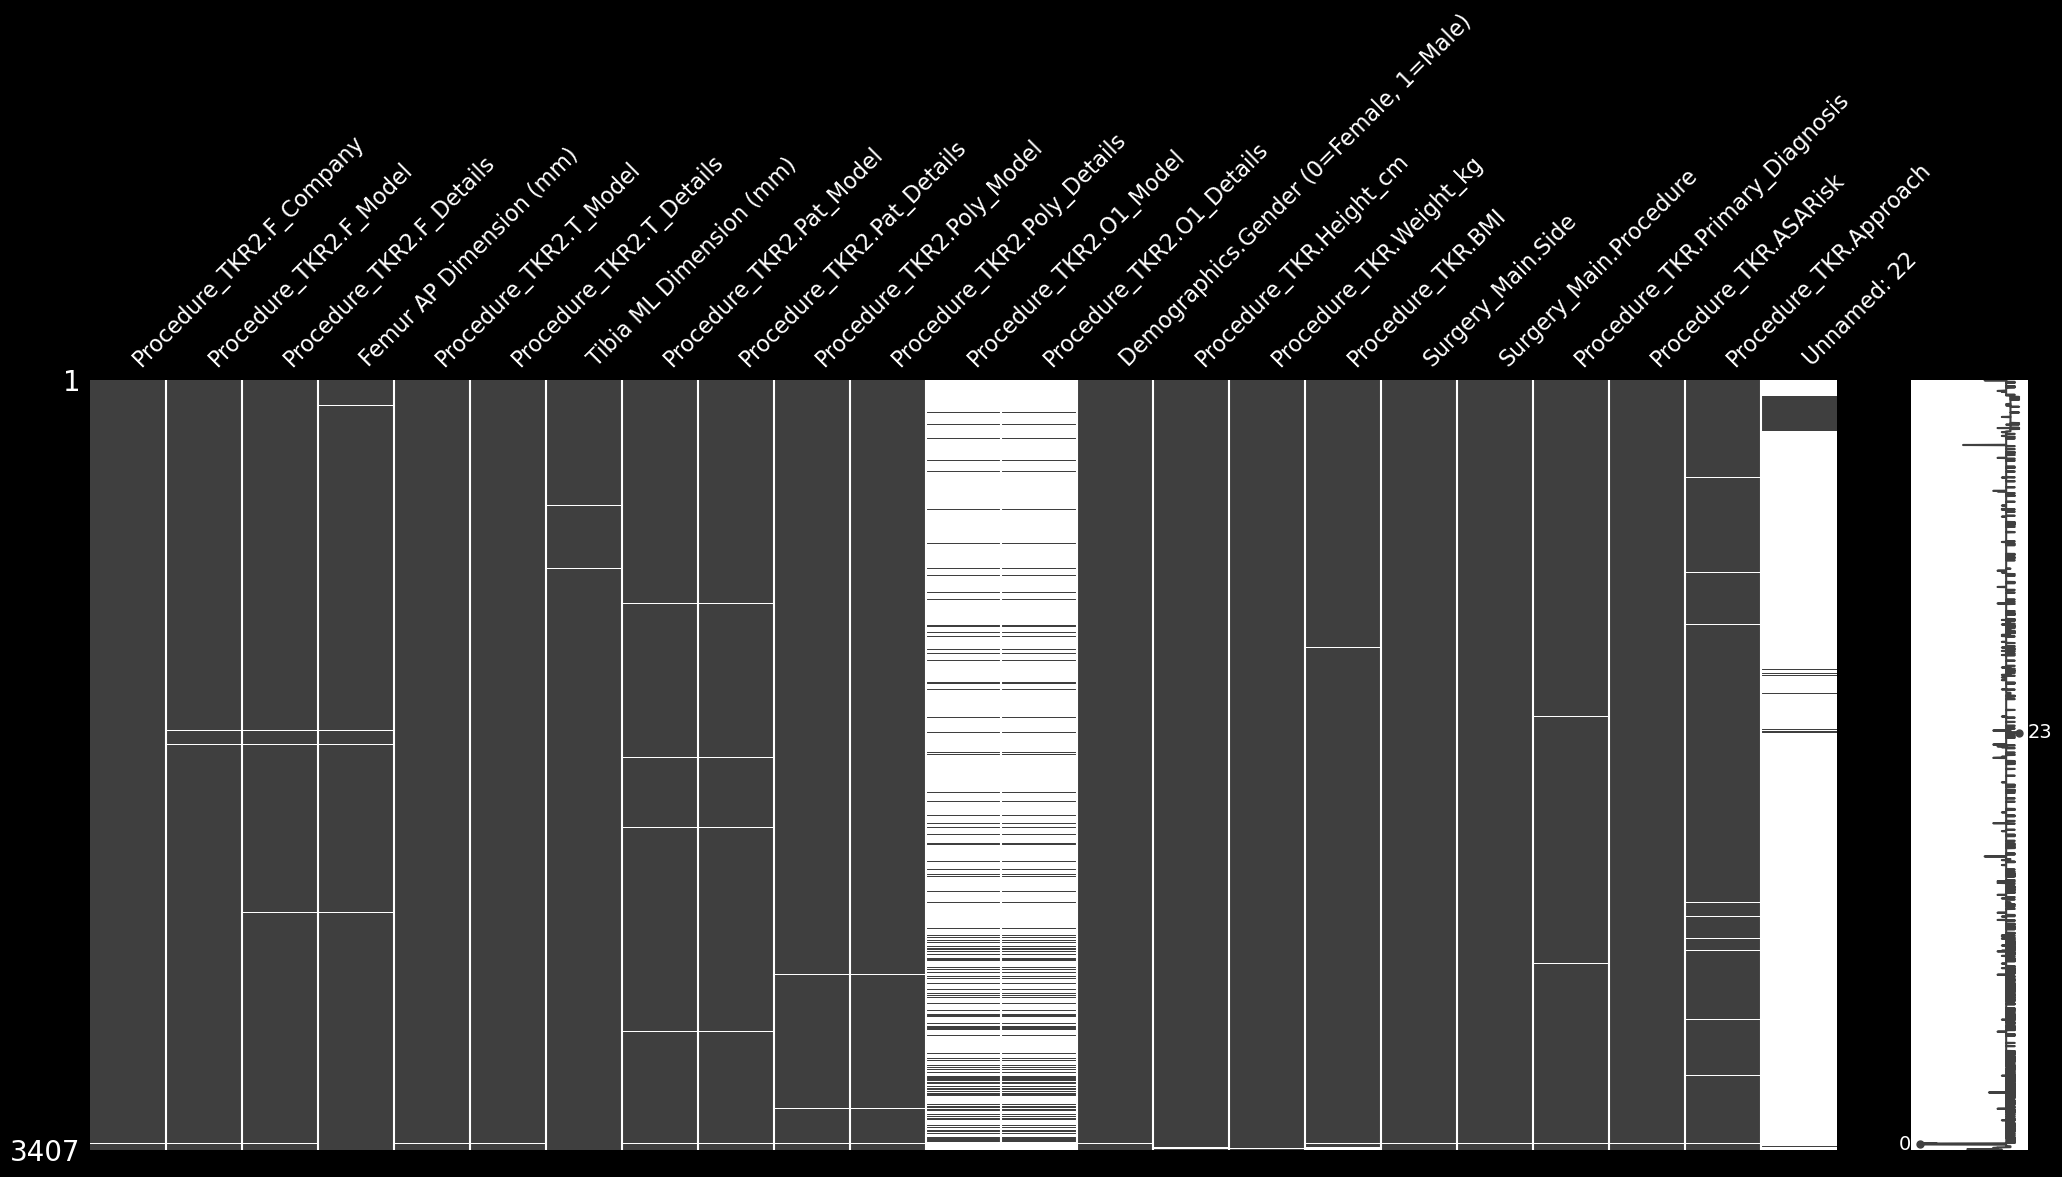

In [17]:
# Visualize missing values in the training data
msno.matrix(tka_train);

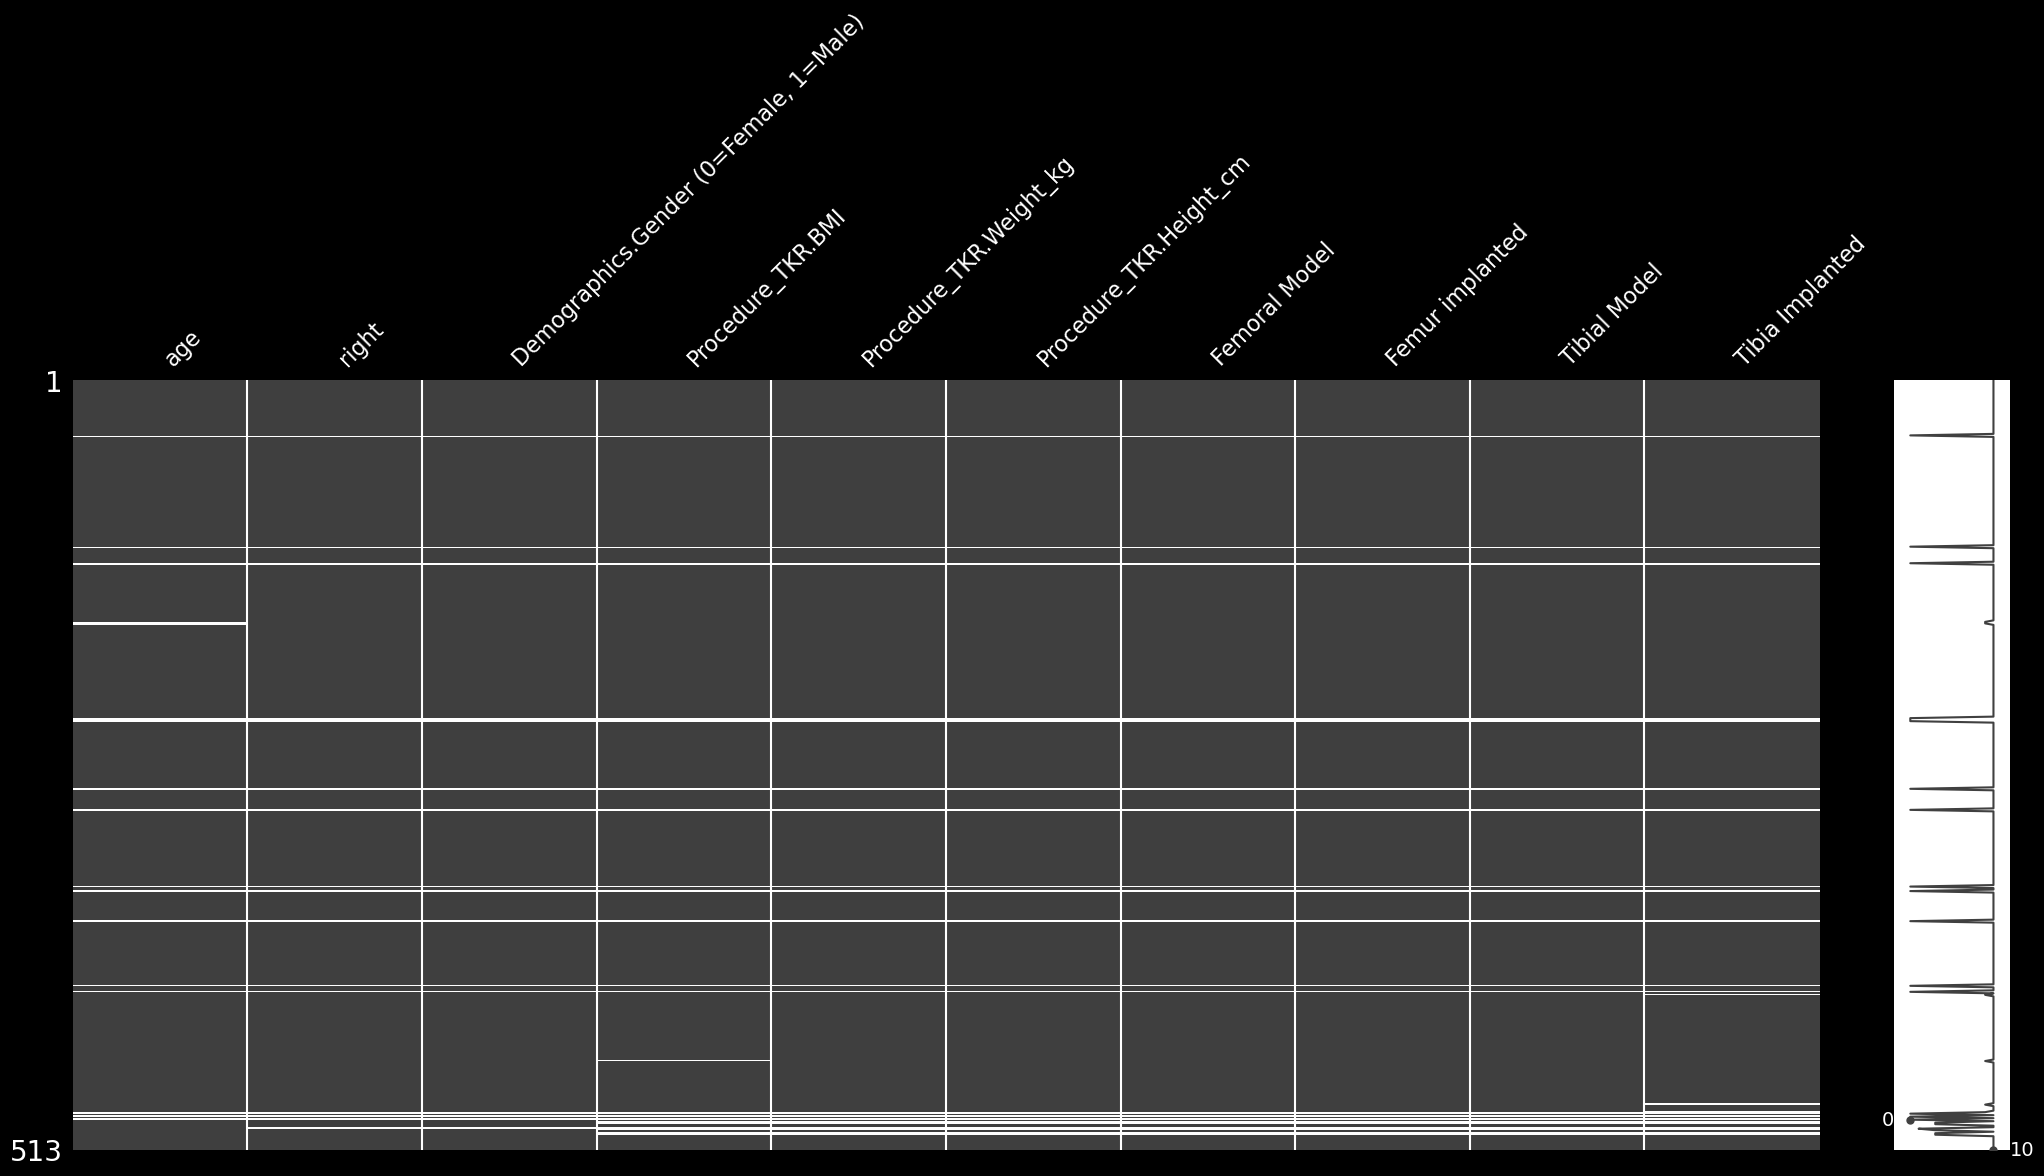

In [18]:
# Visualize missing values in the testing data
msno.matrix(tka_test);

## Clean

### Demographic Variables

In [19]:
# Select only the demographic features from the dataset and the target.
train_features = ['Demographics.Gender (0=Female, 1=Male)',
                  'Procedure_TKR.Height_cm', 
                  'Procedure_TKR.Weight_kg',
                  'Procedure_TKR.BMI', 
                  'Surgery_Main.Side', 
                  'Femur AP Dimension (mm)', 
                  'Tibia ML Dimension (mm)',]

test_features = ['Demographics.Gender (0=Female, 1=Male)', 
                 'Procedure_TKR.Height_cm',
                 'Procedure_TKR.Weight_kg',
                 'Procedure_TKR.BMI', 
                 'right',
                 'Femur implanted',
                 'Tibia Implanted']

In [20]:
train_df = tka_train[train_features]
test_df = tka_test[test_features]

In [21]:
# Display the first 5 rows of the training data
train_df.head()

,"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.Height_cm,Procedure_TKR.Weight_kg,Procedure_TKR.BMI,Surgery_Main.Side,Femur AP Dimension (mm),Tibia ML Dimension (mm)
0,0.0,60.00,58.64,162.888889,Left,60.4,63.8
1,0.0,116.84,62.20,45.562473,Left,53.5,58.0
2,0.0,127.00,52.00,32.240064,Left,57.5,66.0
3,0.0,124.46,68.64,44.311625,Right,65.3,66.0
4,0.0,121.92,75.00,50.455830,Left,60.8,67.0


In [22]:
# Display the first 5 rows of the testing data
test_df.head()

,"Demographics.Gender (0=Female, 1=Male)",Procedure_TKR.Height_cm,Procedure_TKR.Weight_kg,Procedure_TKR.BMI,right,Femur implanted,Tibia Implanted
0,0.0,177.8,95.3,30.13,1,66.0,74.0
1,1.0,173.2,100.2,32.49,0,70.0,77.0
2,0.0,170.2,98.4,34.00,0,65.0,74.0
3,0.0,160.0,62.1,24.27,0,59.0,64.0
4,1.0,180.3,161.0,49.51,1,75.0,80.0


### Column names

In [23]:
train_df = train_df.rename(columns={'Demographics.Gender (0=Female, 1=Male)': 'gender',
                                    'Procedure_TKR.Height_cm': 'height_cm',
                                    'Procedure_TKR.Weight_kg': 'weight_kg',
                                    'Procedure_TKR.BMI': 'bmi',
                                    'Surgery_Main.Side': 'surgery_side',
                                    'Femur AP Dimension (mm)': 'femur_dim',
                                    'Tibia ML Dimension (mm)': 'tibia_dim'})

test_df = test_df.rename(columns={'Demographics.Gender (0=Female, 1=Male)': 'gender',
                                  'Procedure_TKR.Height_cm': 'height_cm',
                                  'Procedure_TKR.Weight_kg': 'weight_kg',
                                  'Procedure_TKR.BMI': 'bmi',
                                  'right': 'surgery_side',
                                  'Femur implanted': 'femur_dim',
                                  'Tibia Implanted': 'tibia_dim'})

In [24]:
# Display the first 5 rows of the training data
train_df.head()

,gender,height_cm,weight_kg,bmi,surgery_side,femur_dim,tibia_dim
0,0.0,60.00,58.64,162.888889,Left,60.4,63.8
1,0.0,116.84,62.20,45.562473,Left,53.5,58.0
2,0.0,127.00,52.00,32.240064,Left,57.5,66.0
3,0.0,124.46,68.64,44.311625,Right,65.3,66.0
4,0.0,121.92,75.00,50.455830,Left,60.8,67.0


In [25]:
# Display the first 5 rows of the testing data
test_df.head()

,gender,height_cm,weight_kg,bmi,surgery_side,femur_dim,tibia_dim
0,0.0,177.8,95.3,30.13,1,66.0,74.0
1,1.0,173.2,100.2,32.49,0,70.0,77.0
2,0.0,170.2,98.4,34.00,0,65.0,74.0
3,0.0,160.0,62.1,24.27,0,59.0,64.0
4,1.0,180.3,161.0,49.51,1,75.0,80.0


### Duplicates

In [26]:
# Drop duplicates from train and test sets
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

# Check for duplicates in the training data
print(f"Duplicates in training data: {train_df.duplicated().sum()}")

# Check for duplicates in the testing data
print(f"Duplicates in testing data: {test_df.duplicated().sum()}")

Duplicates in training data: 0
Duplicates in testing data: 0


### Outliers

In [27]:
# Calculate z-score for each numeric column in the training data
z_scores = (train_df.select_dtypes(include=np.number) - train_df.select_dtypes(include=np.number).mean()) / train_df.select_dtypes(include=np.number).std()

# Remove rows with z-score greater than 3
train_df = train_df[(z_scores.abs() < 3).all(axis=1)]

# Calculate z-score for each numeric column in the testing data
z_scores = (test_df.select_dtypes(include=np.number) - test_df.select_dtypes(include=np.number).mean()) / test_df.select_dtypes(include=np.number).std()

# Remove rows with z-score greater than 3
test_df = test_df[(z_scores.abs() < 3).all(axis=1)]

In [28]:
# Display the shape of the training data using f strings
print(f"Training data shape: {train_df.shape}")

# Display the shape of the testing data using f strings
print(f"Testing data shape: {test_df.shape}")


Training data shape: (3300, 7)
Testing data shape: (476, 7)


In [29]:
train_df.head()

,gender,height_cm,weight_kg,bmi,surgery_side,femur_dim,tibia_dim
1,0.0,116.84,62.20,45.562473,Left,53.5,58.0
2,0.0,127.00,52.00,32.240064,Left,57.5,66.0
3,0.0,124.46,68.64,44.311625,Right,65.3,66.0
4,0.0,121.92,75.00,50.455830,Left,60.8,67.0
5,0.0,127.00,72.73,45.092690,Right,59.0,63.8


In [30]:
test_df.head()

,gender,height_cm,weight_kg,bmi,surgery_side,femur_dim,tibia_dim
0,0.0,177.8,95.3,30.13,1,66.0,74.0
1,1.0,173.2,100.2,32.49,0,70.0,77.0
2,0.0,170.2,98.4,34.00,0,65.0,74.0
3,0.0,160.0,62.1,24.27,0,59.0,64.0
4,1.0,180.3,161.0,49.51,1,75.0,80.0


### Missing values

In [31]:
# Count null values in the training data
train_df.isnull().sum()


gender          0
height_cm       0
weight_kg       0
bmi             0
surgery_side    0
femur_dim       0
tibia_dim       0
dtype: int64

In [32]:
# Count null values in the testing data
test_df.isnull().sum()

gender          0
height_cm       0
weight_kg       0
bmi             0
surgery_side    0
femur_dim       0
tibia_dim       0
dtype: int64

### Data Values

In [33]:
# Convert numeric variables to 2 decimal places in the training data
train_df = train_df.round(2)

# Convert numeric variables to 2 decimal places in the testing data
test_df = test_df.round(2)


### Data Types

In [34]:
# Check data types of the training data
print(train_df.dtypes)

# Check data types of the testing data
print(test_df.dtypes)

# Clean data types if necessary
train_df['gender'] = train_df['gender'].astype(int)
test_df['gender'] = test_df['gender'].astype(int)


gender          float64
height_cm       float64
weight_kg       float64
bmi             float64
surgery_side     object
femur_dim       float64
tibia_dim       float64
dtype: object
gender          float64
height_cm       float64
weight_kg       float64
bmi             float64
surgery_side     object
femur_dim       float64
tibia_dim       float64
dtype: object


### Encoding

In [35]:
# Convert surgery side to numeric in the training data
train_df['surgery_side'] = train_df['surgery_side'].map({'Left': 0, 'Right': 1})

# Get the correct entries for our test df
test_df = test_df[test_df['surgery_side'].isin([0, 1])]

# Convert surgery side to int in the testing data
test_df['surgery_side'] = test_df['surgery_side'].astype(int)


In [36]:
train_df.head()

,gender,height_cm,weight_kg,bmi,surgery_side,femur_dim,tibia_dim
1,0,116.84,62.20,45.56,0,53.5,58.0
2,0,127.00,52.00,32.24,0,57.5,66.0
3,0,124.46,68.64,44.31,1,65.3,66.0
4,0,121.92,75.00,50.46,0,60.8,67.0
5,0,127.00,72.73,45.09,1,59.0,63.8


In [37]:
test_df.head()

,gender,height_cm,weight_kg,bmi,surgery_side,femur_dim,tibia_dim
0,0,177.8,95.3,30.13,1,66.0,74.0
1,1,173.2,100.2,32.49,0,70.0,77.0
2,0,170.2,98.4,34.00,0,65.0,74.0
3,0,160.0,62.1,24.27,0,59.0,64.0
4,1,180.3,161.0,49.51,1,75.0,80.0


In [38]:
# Recheck for duplicates in the training and testing data
print(f"Duplicates in training data: {test_df.duplicated().sum()}")
print(f"Duplicates in testing data: {test_df.duplicated().sum()}")

# Drop duplicates
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

Duplicates in training data: 0
Duplicates in testing data: 0


## Store

In [39]:
# Save the cleaned training data
train_df.to_csv(r'C:\Users\HP\Desktop\Predicting-Component-Sizing-in-Primary-Total-Knee-Arthroplasty-using-Demographic-Variables\Data\Processed\train_cleaned.csv', index=False)

# Save the cleaned test data
test_df.to_csv(r'C:\Users\HP\Desktop\Predicting-Component-Sizing-in-Primary-Total-Knee-Arthroplasty-using-Demographic-Variables\Data\Processed\test_cleaned.csv', index=False)